<h1 align="center"> Практична робота №1 </h1>
<h2 align="center"> <b> Великі дані, типи, нормалізація </b> </h2>
<hr> <h3 align="center">Виконав студент групи ФБ-35 Куб'юк Дмитро </h3>


Датасет завантажую за посиланням https://www.kaggle.com/datasets/joebeachcapital/wine-quality

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Мій датасет по замовчуванню розбитий на дві частини, тому їх потрібно об'єднати (додатково додаю стобчик з категоріальною ознакою)

In [255]:
red_df = pd.read_csv('data/winequality-red.csv', sep=';')
white_df = pd.read_csv('data/winequality-white.csv', sep=';')

red_df['type'] = 'red'
white_df['type'] = 'white'

df = pd.concat([red_df, white_df], ignore_index=True)

df.to_csv("data/winequality.csv")

print(f"Кількість рядків в датасеті: {len(df.index)}")
df.head()


Кількість рядків в датасеті: 6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Очистити датасет від викидів, рядків, що не містять значень. Всі маніпуляції проводити над стовбцем з числовим значенням. 

Кількість пропущених значень:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Було


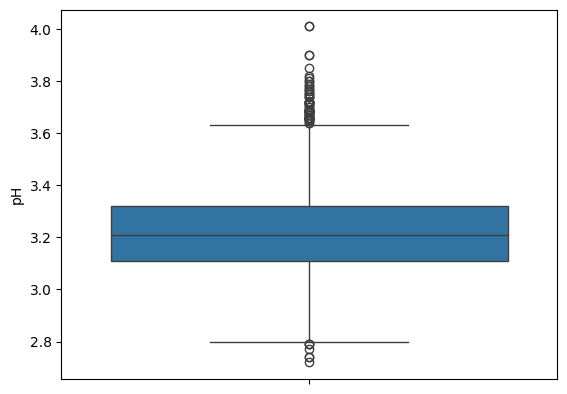


Стало


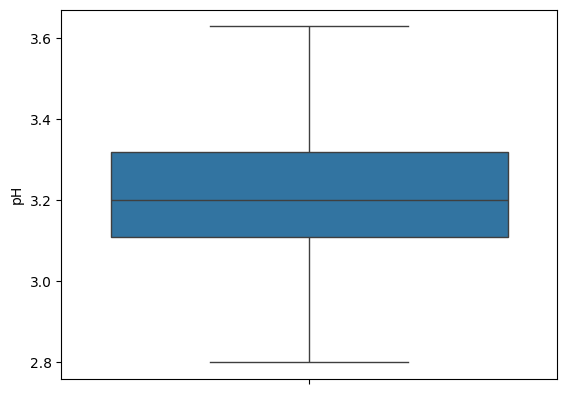

In [256]:
print(f"Кількість пропущених значень:\n{df.isna().sum()}")

def show_box(df, col): 
    sns.boxplot(df[col])
    plt.show()

def col_coef(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper 

column = "pH"

print("\nБуло")
show_box(df, column)

lower, upper = col_coef(df, column)
df = df[(df[column] >= lower) & (df[column] <= upper)]

print("\nСтало")
show_box(df, column)


Порахувати середнє, усічене середнє, медіану, дисперсією, стандартне відхилення, середнє відхидення, абсолютно медіане відхилення. 

In [257]:
def fnc(df, col):
    df_col = df[col]

    # середнє
    mean_val = df_col.mean()

    # усічене середнє (10%)
    q_low = df_col.quantile(0.1)
    q_high = df_col.quantile(0.9)
    trimmed_mean_val = df_col[(df_col >= q_low) & (df_col <= q_high)].mean()

    # медіана
    median_val = df_col.median()

    # дисперсія
    variance_val = df_col.var()

    # стандартне відхилення
    std_val = df_col.std()

    # середнє абсолютне відхилення від середнього
    mad_mean = (df_col - mean_val).abs().mean()

    # медіанне абсолютне відхилення
    mad_abs = (df_col - median_val).abs().median()

    return {
        "mean": mean_val,
        "trimmed_mean": trimmed_mean_val,
        "median": median_val,
        "variance": variance_val,
        "std": std_val,
        "mad_mean": mad_mean,
        "mad_abs": mad_abs
    }


results = fnc(df, column)
for first, second in results.items():
    print(f"{first}: {second}")


mean: 3.213810709838107
trimmed_mean: 3.2117858501331304
median: 3.2
variance: 0.0232167077414235
std: 0.15237029809455482
mad_mean: 0.12298291432036462
mad_abs: 0.10000000000000009


Нормалізація мін. мах.

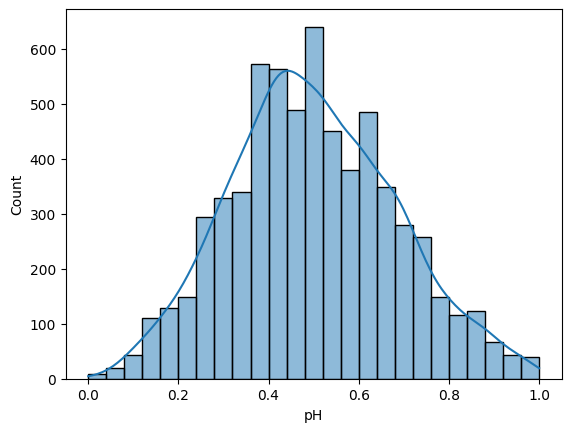

In [258]:
def min_max_norm(df, col):
    df_col_min = df[col].min()
    df_col_max = df[col].max()

    df_norm = (df[col] - df_col_min) / (df_col_max - df_col_min)

    return df_norm

df_min_max_norm = min_max_norm(df, column)
df_min_max_norm.to_csv("data/winequality_min_max_norm.csv")

sns.histplot(df_min_max_norm, bins=25, edgecolor="black", kde=True)
plt.xlabel(column)
plt.show()

Cередня нормалізація.

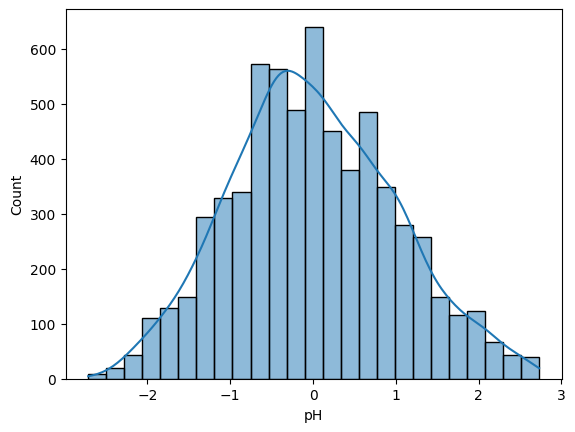

In [259]:
def mean_norm(df, col):
    df_col_mean = df[col].mean()
    df_col_std = df[col].std()

    df_norm = (df[col] - df_col_mean) / df_col_std

    return df_norm

df_mean_norm = mean_norm(df, column)
df_mean_norm.to_csv("data/winequality_mean_norm.csv")

sns.histplot(df_mean_norm, bins=25, edgecolor="black", kde=True)
plt.xlabel(column)
plt.show()

Додатковий графік.

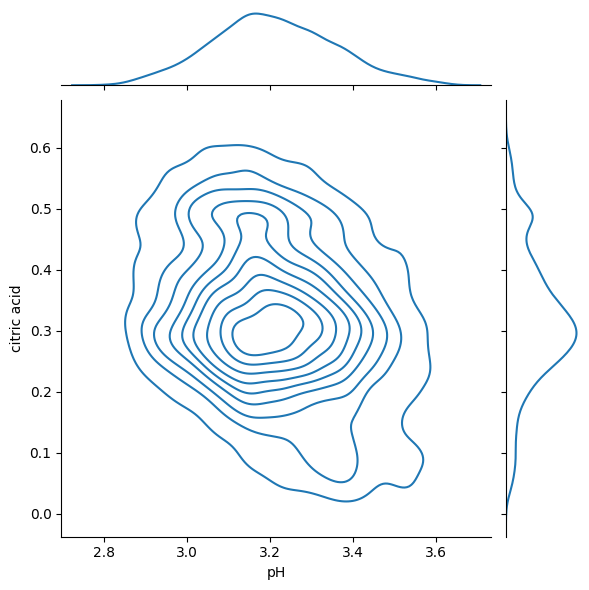

In [260]:
lower, upper = col_coef(df, "citric acid")
df = df[(df["citric acid"] >= lower) & (df["citric acid"] <= upper)]

sns.jointplot(x=df["pH"], y=df["citric acid"], kind="kde")
plt.show()